# Logistic Regression

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Sigmoid Function with plot

In [27]:
# Sigmoid function
def sigmoid(x):
    """Returns the value of sigmoid x
    
    :param x: The input value for the function
    :type x: int, float or np.array
    :returns: Float value of sigmoid x
    """
    return 1/(1+ np.exp(-x))

Text(0.5,1,'Sigmoid Function')

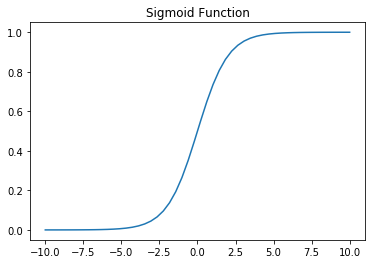

In [28]:
x_vals = np.linspace(-10, 10)
plt.plot(x_vals, sigmoid(x_vals))
plt.title('Sigmoid Function')

Hypothesis Function

In [158]:
def hypothesis(theta, features):
    """Hypothesis function for logistic regression
    
    :param theta: Array of predictors
    :param features: Array of features
    :type theta: np.array
    :type features: np.array
    :returns: Hypothesis value of the sample values
    """
    return sigmoid(np.dot(features, theta.T))

Logistic Prediction

In [75]:
def prediction(theta, features, boundary=0.5):
    """Predictor for logistic regression
    
    :param theta: Array of predictors
    :param features: Array of features
    :param boundary: The value where we split decision results for hypothesis
        must be between 0 and 1, inclusive
    :type theta: np.array
    :type features: np.array
    :type boundary: float
    :returns: Hypothesis value of the sample values
    """
    hypothesis_value = hypothesis(theta, features)
    if hypothesis_value >= boundary:
        return 1
    else:
        return 0

Cost Function using Cross Entropy

In [146]:
def cost(theta, features, labels):
    """Cost function for a prediction
    
    :param theta: Trained predictors for dataset
    :param features: Features for prediction
    :param labels: Population values corresponding to features
    """
    theta = np.array(theta)
    features = np.array(features)
    labels = np.array(labels)
    cost_true = -labels * np.log(hypothesis(theta, features))
    cost_false = -(1-labels) * np.log(1 - hypothesis(theta, features))
    cost = np.sum((cost_true + cost_false)) / len(features)
    return cost

Load in data to perform classification on exam passing rate

In [68]:
results = pd.read_csv('data/exam_passing_rate.csv', names=['Exam 1', 'Exam 2', 'Passed'])
results.insert(0, 'Ones', 1)

Text(0.5,1,'yes')

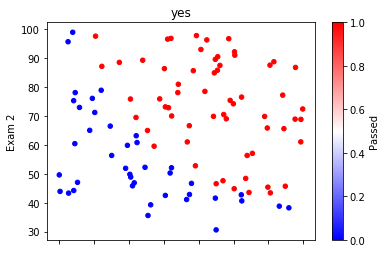

In [69]:
ax = results.plot('Exam 1', 'Exam 2', kind='scatter', c='Passed', cmap='bwr')
plt.xlabel('Exam 1')
ax.set_title('yes')

In [168]:
# Group features and target values
x_vals = results[[col for col in results.columns if col != 'Passed']]
y_vals = results[['Passed']]

# Create matrices and vectors for efficient calculations
x_array = np.array(x_vals.values)
y_array = np.array(y_vals.values)
theta_array = np.zeros((1, 3))

In [169]:
cost(theta_array, x_array, y_array)

0.6931471805599453

In [166]:
np.zeros((1, 3))

array([[0., 0., 0.]])

In [171]:
def calc_gradient(theta, features, labels):
    theta = np.array(theta.reshape((1, 3)))
    print(theta)
    features = np.array(features)
    labels = np.array(labels)
    predictions = hypothesis(theta, features)
    error = predictions - labels
    weighted_error = np.dot(features.T, error)
    gradient = np.sum(weighted_error) / len(features)
    return gradient

In [162]:
x_array.shape, theta_array.shape, y_array.shape

((100, 3), (3,), (100, 1))

In [163]:
calc_gradient(theta_array, x_array, y_array)

[0. 0. 0.]


-2337.205879480474

In [ ]:
cost

In [80]:
import scipy.optimize as opt

In [173]:
output = opt.fmin_bfgs(f=cost, x0=theta_array, fprime=calc_gradient, args=(x_array, y_array))

[[0. 0. 0.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()